In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet

In [6]:
import os


In [7]:
os.getcwd()

'C:\\Users\\vsk31'

In [8]:
path = 'C:\\Users\\vsk31\\Downloads\\25_Projects\\25_Projects\\ML\\Traffic Forecast - Time Series Analysis\\'

In [9]:
df = pd.read_csv(path+'Traffic data.csv')

In [10]:
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [11]:
df.isnull().sum()

ID          0
Datetime    0
Count       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [13]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format = '%d-%m-%Y %H:%M')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


In [15]:
df.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


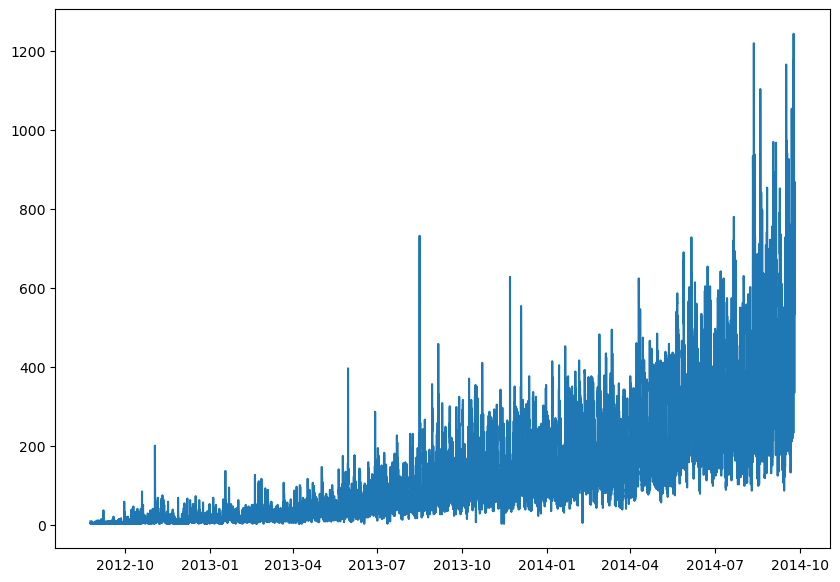

In [16]:
plt.figure(figsize=(10,7))
plt.plot(df['Datetime'],df['Count'])

In [17]:
df.index = df['Datetime']


In [18]:
df['y'] = df['Count']
df.drop(columns=['ID', 'Datetime', 'Count'], axis=1, inplace=True)
df = df.resample('D').sum()
df.head()

,y
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


In [19]:
df['ds'] = df.index

In [20]:
df.head()

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29


In [21]:
size = 60
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=size/len(df), shuffle=False)

In [22]:
train.tail()

,y,ds
Datetime,,
2014-07-23,10130,2014-07-23
2014-07-24,8156,2014-07-24
2014-07-25,7192,2014-07-25
2014-07-26,6562,2014-07-26
2014-07-27,6094,2014-07-27


In [23]:
test.head()

,y,ds
Datetime,,
2014-07-28,8546,2014-07-28
2014-07-29,8218,2014-07-29
2014-07-30,8498,2014-07-30
2014-07-31,8740,2014-07-31
2014-08-01,9186,2014-08-01


In [24]:
len(df)

762

In [25]:
len(df['ds'])

762

In [26]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(train)

19:04:43 - cmdstanpy - INFO - Chain [1] start processing
19:04:43 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = model.make_future_dataframe(periods=60)
future

,ds
0,2012-08-25
1,2012-08-26
2,2012-08-27
3,2012-08-28
4,2012-08-29
...,...
757,2014-09-21
758,2014-09-22
759,2014-09-23
760,2014-09-24


In [28]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-480.337909,-1817.944070,151.981683,-480.337909,-480.337909,-339.583579,-339.583579,-339.583579,-846.171911,-846.171911,-846.171911,506.588331,506.588331,506.588331,0.0,0.0,0.0,-819.921488
1,2012-08-26,-473.321772,-1887.825051,-35.039457,-473.321772,-473.321772,-455.440680,-455.440680,-455.440680,-967.137423,-967.137423,-967.137423,511.696743,511.696743,511.696743,0.0,0.0,0.0,-928.762452
2,2012-08-27,-466.305636,-488.322428,1435.523231,-466.305636,-466.305636,946.509678,946.509678,946.509678,431.194541,431.194541,431.194541,515.315137,515.315137,515.315137,0.0,0.0,0.0,480.204042
3,2012-08-28,-459.289500,-415.971305,1550.195732,-459.289500,-459.289500,957.117210,957.117210,957.117210,439.558793,439.558793,439.558793,517.558416,517.558416,517.558416,0.0,0.0,0.0,497.827710
4,2012-08-29,-452.273363,-521.245658,1442.727577,-452.273363,-452.273363,918.302037,918.302037,918.302037,399.753865,399.753865,399.753865,518.548172,518.548172,518.548172,0.0,0.0,0.0,466.028674


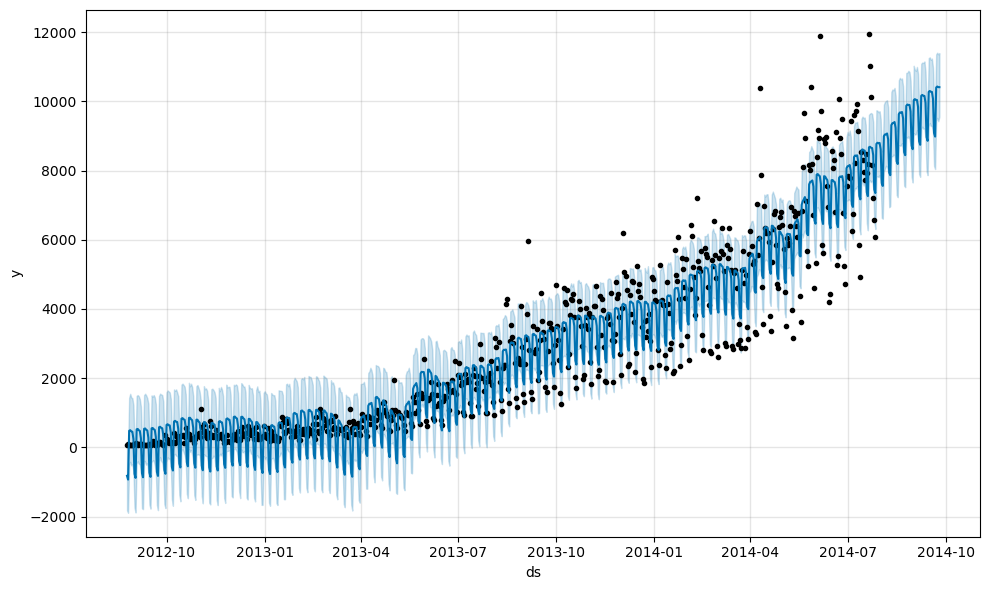

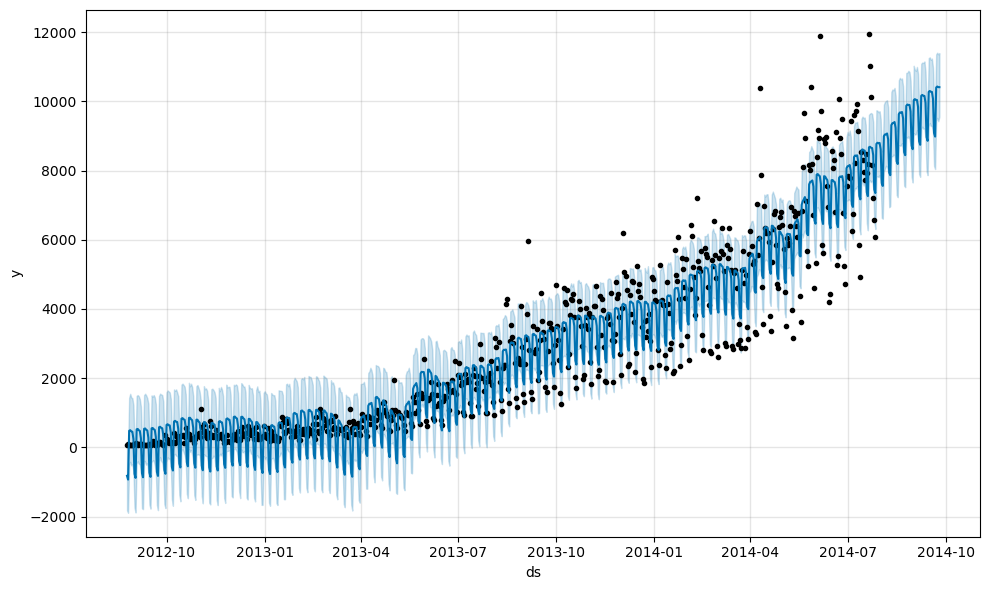

In [29]:
model.plot(forecast)

In [30]:
pred = forecast.iloc[-60:, :]
len(pred)

60

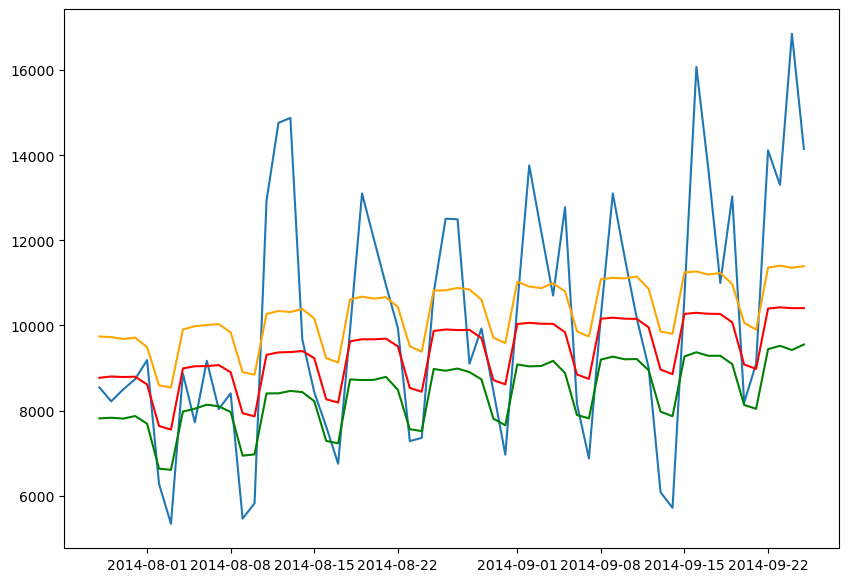

In [31]:
plt.figure(figsize=(10,7))
plt.plot(test['ds'], test['y'])
plt.plot(pred['ds'], pred['yhat'], color='red')
plt.plot(pred['ds'], pred['yhat_lower'], color='green')
plt.plot(pred['ds'], pred['yhat_upper'], color='orange')
plt.show()